### Description du Jeu de Données : Lots de Bananes

Le tableau suivant récapitule les caractéristiques physiques et économiques du lot de bananes étudié ($n=10$) :

$$
\begin{array}{|l|c|c|c|c|c|c|c|c|c|c|}
\hline
\textbf{Paramètre} & B_1 & B_2 & B_3 & B_4 & B_5 & B_6 & B_7 & B_8 & B_9 & B_{10} \\ \hline
\text{Taille (cm)} & 35 & 60 & 40 & 40.5 & 60 & 35 & 32 & 48 & 75 & 35 \\ \hline
\text{Prix (€)} & 1 & 2 & 1 & 1 & 2 & 1 & 1 & 2 & 2 & 1 \\ \hline
\text{Couleur (0/1)} & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 1 & 1 & 1 \\ \hline
\text{Points noirs} & 0 & 0 & 0 & 0 & 0 & 1 & 1 & 0 & 2 & 2 \\ \hline
\text{Âge (jours)} & 27.9 & 28.3 & 33.9 & 30.9 & 34.4 & 32.4 & 31.5 & 29.9 & 26.5 & 34.8 \\ \hline
\end{array}
$$

#### Hypothèses de construction du modèle :
Dans le cadre de cette analyse PCA, les relations suivantes ont été injectées :
1.  **Corrélation Taille/Prix :** Le prix a été modélisé pour évoluer positivement avec la taille de la banane.
2.  **Corrélation Couleur/Points Noirs :** L'état de maturité visuelle (couleur) est directement lié à l'apparition des points noirs.
3.  **Indépendance Temporelle :** La variable `age_en_jours` a été générée de manière aléatoire, ne présentant aucune corrélation structurelle avec les caractéristiques physiques.

In [1]:
import numpy as np
import pandas as pd

In [2]:
data = {
    'taille': [35, 60, 40, 40.5, 60, 35, 32, 48, 75, 35],
    'prix': [1, 2, 1, 1, 2, 1, 1, 2, 2, 1],
    'couleur': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1],
    'nbr_de_points_noirs': [0, 0, 0, 0, 0, 1, 1, 0, 2, 2],
    'age_en_jours': [27.9, 28.3, 33.9, 30.9, 34.4, 32.4, 31.5, 29.9, 26.5, 34.8]
}

# Conversion en DataFrame
df = pd.DataFrame(data)

# Affichage du résultat
print(df)

   taille  prix  couleur  nbr_de_points_noirs  age_en_jours
0    35.0     1        0                    0          27.9
1    60.0     2        0                    0          28.3
2    40.0     1        0                    0          33.9
3    40.5     1        0                    0          30.9
4    60.0     2        0                    0          34.4
5    35.0     1        1                    1          32.4
6    32.0     1        1                    1          31.5
7    48.0     2        1                    0          29.9
8    75.0     2        1                    2          26.5
9    35.0     1        1                    2          34.8


In [3]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
import matplotlib.pyplot as plt

In [4]:
#Step1: We calculate the mean of the scaled data.
df_normalized_mean = pd.DataFrame(scale(df))
instruments = df.columns

In [ ]:
df_normalized_mean

,0,1,2,3,4
0,-0.809741,-0.816497,-1.0,-0.75,-1.150486
1,1.022252,1.224745,-1.0,-0.75,-1.004392
2,-0.443342,-0.816497,-1.0,-0.75,1.040916
3,-0.406703,-0.816497,-1.0,-0.75,-0.054785
4,1.022252,1.224745,-1.0,-0.75,1.223533
5,-0.809741,-0.816497,1.0,0.50,0.493065
6,-1.029580,-0.816497,1.0,0.50,0.164355
7,0.142895,1.224745,1.0,-0.75,-0.420019
8,2.121448,1.224745,1.0,1.75,-1.661813
9,-0.809741,-0.816497,1.0,1.75,1.369626


: 

In [ ]:
#Step3: We calculate the PCA using fit_transform
pca = PCA(n_components=3)
YC_PCA = pca.fit_transform(df_normalized_mean)

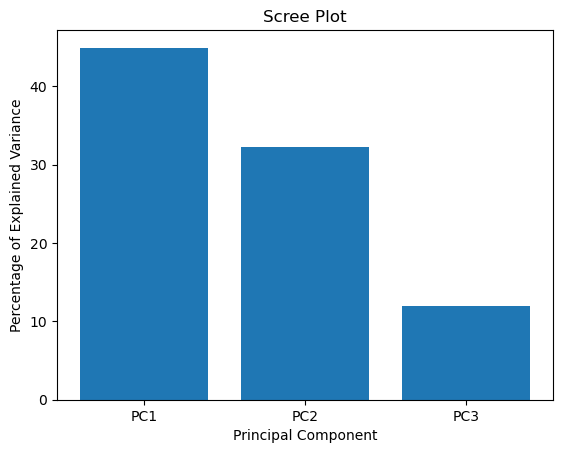

In [ ]:
#Step4: Create a SCREE plot to check the weights of each component
per_var = np.round(pca.explained_variance_ratio_ * 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
plt.bar(x=range(1, len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot');

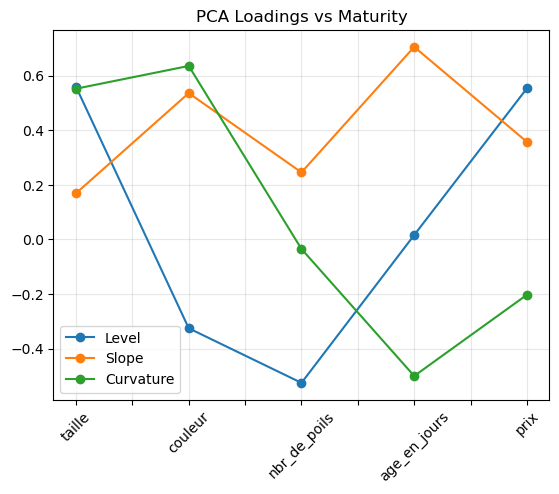

In [ ]:
pd.DataFrame(pca.components_.T, index=instruments,
             columns=['Level','Slope','Curvature']).plot(marker='o', title='PCA Loadings vs Maturity')
plt.xticks(rotation=45); plt.grid(alpha=0.3); plt.show()

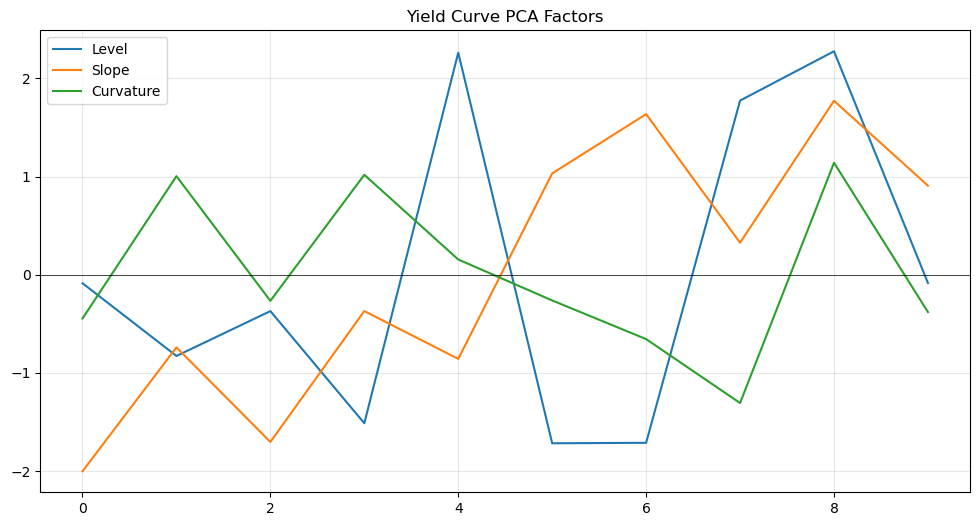

In [ ]:
dates = df_normalized_mean.index
scores = pd.DataFrame(YC_PCA, index=dates, columns=['Level', 'Slope', 'Curvature'])

scores.plot(figsize=(12,6), title="Yield Curve PCA Factors")
plt.axhline(0, color='k', linewidth=0.5)
plt.grid(alpha=0.3)
plt.show()